In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy.optimize import curve_fit

In [2]:
db1 = pd.read_csv("1.csv", header=None, delimiter="\t")
db1 = db1.T.rename(columns={0: "n", 1: "V[V] 2mm", 2: "Verr[V] 2mm", 3: "V[V] 4mm", 4: "Verr[V] 4mm"})
print(db1)

       n  V[V] 2mm  Verr[V] 2mm  V[V] 4mm  Verr[V] 4mm
0    0.0       0.0     1.000000       0.0     1.000000
1    1.0       3.0     1.000000       5.0     1.003743
2    2.0       5.5     1.003743       8.5     1.003743
3    3.0       9.0     1.011187      13.0     1.003743
4    4.0      11.0     1.014889      15.5     1.003743
5    5.0      13.5     1.011187      19.0     1.003743
6    6.0      15.0     1.033199      22.0     1.003743
7    7.0      18.0     1.033199      25.0     1.003743
8    8.0      20.5     1.025914      28.5     1.011187
9    9.0      22.5     1.033199       NaN          NaN
10  10.0      25.5     1.033199       NaN          NaN


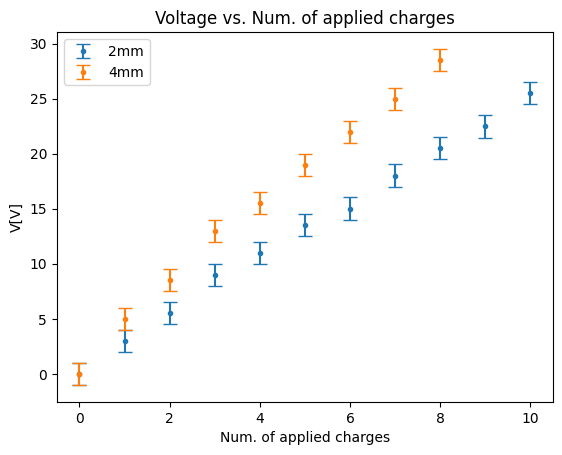

In [3]:
# xerr negligible
plt.errorbar(db1["n"], db1["V[V] 2mm"], yerr=db1["Verr[V] 2mm"], fmt=".", capsize=5, label="2mm")
plt.errorbar(db1["n"], db1["V[V] 4mm"], yerr=db1["Verr[V] 4mm"], fmt=".", capsize=5, label="4mm")
plt.ylabel("V[V]")
plt.xlabel("Num. of applied charges")
plt.title("Voltage vs. Num. of applied charges")
plt.legend()
plt.show()

In [4]:
db2 = pd.read_csv("2.csv", header=None, delimiter="\t")
db2 = db2.T.rename(columns={0: "dist[cm]", 1: "V[V]", 2: "Verr[V]"})
print(db2)

   dist[cm]      V[V]   Verr[V]
0       0.0  3.166667  0.305505
1       2.0  3.333333  0.305505
2       4.0  3.333333  0.305505
3       6.0  3.666667  0.305505
4       8.0  4.500000  0.100000
5      10.0  6.333333  0.305505


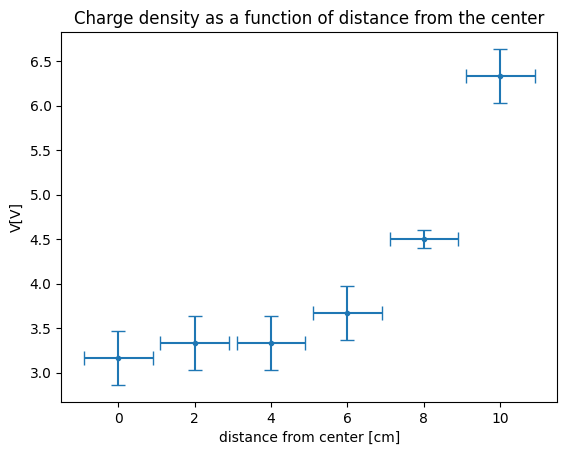

In [5]:
plt.errorbar(db2["dist[cm]"], db2["V[V]"], yerr=db2["Verr[V]"], xerr=0.9, fmt=".", capsize=5)
plt.title("Charge density as a function of distance from the center")
plt.ylabel("V[V]")
plt.xlabel("distance from center [cm]")
plt.show()

In [6]:
db3 = pd.read_csv("3.csv", header=None, delimiter="\t")
db3 = db3.T.rename(columns={0: "dist[mm]", 1: "V[V]", 2: "Verr[V]"})
print(db3)

    dist[mm]       V[V]   Verr[V]
0        2.0  20.000000  1.000000
1        4.0  30.000000  1.118034
2        8.0  43.333333  1.040833
3       12.0  51.666667  1.040833
4       16.0  55.000000  1.118034
5       20.0  55.000000  1.000000
6       40.0  58.333333  1.258306
7       60.0  66.666667  1.154701
8       80.0  60.000000  1.118034
9      100.0  65.000000  1.118034
10     120.0  70.000000  1.322876


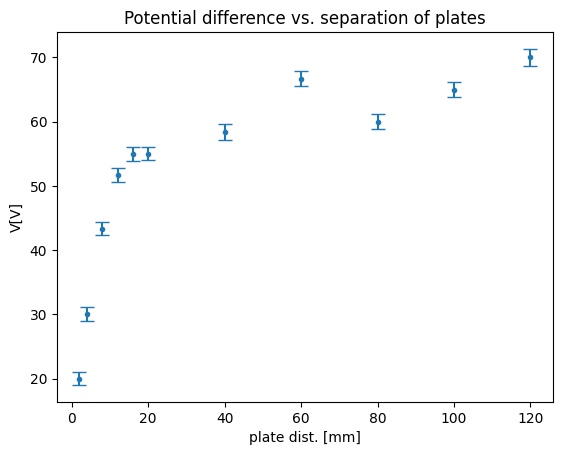

In [7]:
# xerr is negligible
plt.errorbar(db3["dist[mm]"], db3["V[V]"], yerr=db3["Verr[V]"], fmt=".", capsize=5)
plt.title("Potential difference vs. separation of plates")
plt.ylabel("V[V]")
plt.xlabel("plate dist. [mm]")
plt.show()

In [8]:
recipXs = 1 / db3[db3["dist[mm]"] < 18]["dist[mm]"] * 1000  # m
recipVs = 1 / db3[db3["dist[mm]"] < 18]["V[V]"]
recipErrs = db3[db3["dist[mm]"] < 18]["Verr[V]"] * recipVs**2
print(recipXs)
print(recipVs)

0    500.000000
1    250.000000
2    125.000000
3     83.333333
4     62.500000
Name: dist[mm], dtype: float64
0    0.050000
1    0.033333
2    0.023077
3    0.019355
4    0.018182
Name: V[V], dtype: float64


In [9]:
def bestFit(x, a, b):
    return a*x + b

In [10]:
# Find best fit using scipy
popt, pcov = curve_fit(bestFit, recipXs, recipVs, sigma=recipErrs, absolute_sigma=True)
a, b = popt
aerr, berr = np.sqrt(np.diag(pcov))

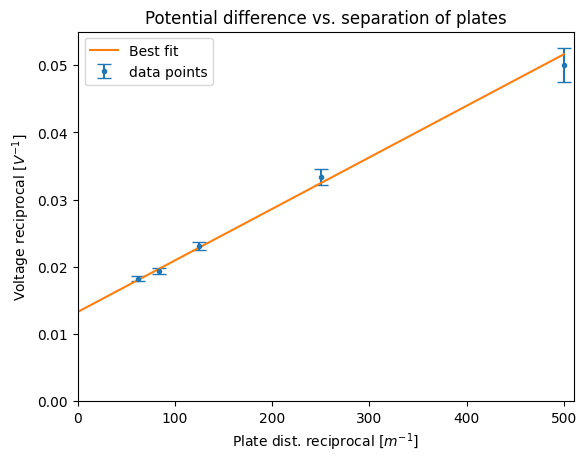

In [11]:
plt.errorbar(recipXs, recipVs, yerr=recipErrs, fmt=".", capsize=5, label="data points")

xs = np.linspace(0, 500, 10000)
ys = bestFit(xs, a, b)
plt.plot(xs, ys, label="Best fit")

plt.title("Potential difference vs. separation of plates")
plt.ylabel(r"Voltage reciprocal [$V^{-1}$]")
plt.xlabel(r"Plate dist. reciprocal [$m^{-1}$]") 
plt.xlim(0, 510)
plt.ylim(0, 0.055)
plt.legend()
plt.show()

$Q = CV$, $C = \frac{\varepsilon_0 A}{x} + C_m$ $\models$ $\frac{1}{V} = \frac{\varepsilon_0 A}{Q} \frac{1}{x} + \frac{C_m}{Q}$

$a = \frac{\varepsilon_0 A}{Q}$ $\models$ $Q = \frac{\varepsilon_0 A}{a}$, $\Delta Q = \varepsilon_0 A \frac{\Delta a}{a^2}$

$b = \frac{C_m}{Q}$ $\models$ $C_m = b Q$, $\Delta C_m = \sqrt{\left(\Delta b Q\right)^2 + \left(b \Delta Q\right)^2}$

In [12]:
print("a = ", a, "+-", aerr)
print("b = ", b, "+-", berr)

epsilon0 = 8.854187817e-12  # [SI]
A = np.pi * (0.1)**2  # [m^2]
Q = epsilon0 * A / a
dQ = epsilon0 * A * aerr / a**2
Cm = b*Q
dCm = np.sqrt((berr*Q)**2 + (b*dQ)**2)

print("Q = ", Q, "+-", dQ)
print("Cm = ", Cm, "+-", dCm)

a =  7.671454534018153e-05 +- 4.334739732048062e-06
b =  0.013261794799811774 +- 0.0004638110775124895
Q =  3.6259422872212295e-09 +- 2.0488312912282325e-10
Cm =  4.8086502569088115e-11 +- 3.195468787910883e-12


a = (7.7 +- 0.5)e-05 [SI]

b = (1.33 +- 0.05)e-02 [SI]

Q = (3.6 +- 0.3)e-10 [Q]

Cm = (4.8 +- 0.4)e-12 [F]

* Errors all look the same size because greatest contribution comes from reading off the instruments (which is a constant err.)